# Tercer Punto

Compare y contraste los tres clasificadores vistos en clase (geométrico, bayesiano y K-NN) según los siguientes criterios:
* ¿Qué suposiciones hace cada uno de los modelos?
* ¿Cuáles son sus requerimientos de entrenamiento en términos de tiempo de cómputo y memoria?
* ¿Cómo cambiará el desempeño de cada uno cuando se aumenta el número de dimensiones del espacio de caracterı́sticas?
* Relacione cada clasificador con un ejemplo realista de aplicación (puede ser del contexto colombiano o de su experiencia personal).

In [12]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Librerías importadas correctamente")


Librerías importadas correctamente


In [5]:
# Cargar el dataset Iris para la comparación
iris = load_iris()
X = iris.data  # Las cuatro características
y = iris.target  # Las tres clases

print("Dataset Iris cargado para comparación:")
print(f"Forma de los datos: {X.shape}")
print(f"Número de clases: {len(np.unique(y))}")
print(f"Clases: {iris.target_names}")
print(f"Características: {iris.feature_names}")

# Crear DataFrame para análisis
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['species'] = iris.target_names[y]

print("\nDistribución de clases:")
print(iris_df['species'].value_counts())


Dataset Iris cargado para comparación:
Forma de los datos: (150, 4)
Número de clases: 3
Clases: ['setosa' 'versicolor' 'virginica']
Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Distribución de clases:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [6]:
# Implementación de los tres clasificadores para comparación

# 1. Clasificador Bayesiano Gaussiano
class GaussianBayesClassifier:
    def __init__(self):
        self.model = GaussianNB()
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)

# 2. Clasificador Geométrico por Mínimos Cuadrados
class GeometricClassifier:
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Convertir etiquetas a -1 y 1 para el clasificador geométrico
        y_binary = np.where(y == 0, -1, 1)
        
        # Agregar columna de unos para el bias
        X_augmented = np.column_stack([np.ones(X.shape[0]), X])
        
        # Calcular pesos usando mínimos cuadrados: w = (X^T X)^(-1) X^T y
        try:
            self.weights = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y_binary
        except np.linalg.LinAlgError:
            # Si la matriz es singular, usar pseudoinversa
            self.weights = np.linalg.pinv(X_augmented) @ y_binary
        
        self.bias = self.weights[0]
        self.weights = self.weights[1:]
    
    def predict(self, X):
        # Calcular predicciones: sign(w^T x + b)
        predictions = np.sign(X @ self.weights + self.bias)
        # Convertir de vuelta a 0 y 1
        return np.where(predictions == -1, 0, 1)

# 3. Clasificador K-NN
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict_single(self, x):
        distances = []
        for i, x_train in enumerate(self.X_train):
            dist = self.euclidean_distance(x, x_train)
            distances.append((dist, self.y_train[i]))
        
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        k_nearest_classes = [neighbor[1] for neighbor in k_nearest]
        most_common = Counter(k_nearest_classes).most_common(1)
        return most_common[0][0]
    
    def predict(self, X_test):
        predictions = []
        for x in X_test:
            pred = self.predict_single(x)
            predictions.append(pred)
        return np.array(predictions)

print("Los tres clasificadores han sido implementados correctamente")


Los tres clasificadores han sido implementados correctamente


## Análisis Comparativo de los Tres Clasificadores

### 1. Suposiciones de cada modelo

#### Clasificador Bayesiano Gaussiano:
- **Independencia condicional**: Las características son independientes entre sí dado el valor de la clase
- **Distribución gaussiana**: Cada característica sigue una distribución normal dentro de cada clase
- **Linealidad**: La frontera de decisión es lineal en el espacio de características

#### Clasificador Geométrico (Mínimos Cuadrados):
- **Separabilidad lineal**: Las clases son linealmente separables en el espacio de características
- **Distribución normal de errores**: Los errores de predicción siguen una distribución normal
- **Homocedasticidad**: La varianza de los errores es constante
- **Independencia de observaciones**: Las muestras son independientes entre sí

#### Clasificador K-NN:
- **Continuidad local**: Puntos cercanos en el espacio de características pertenecen a la misma clase
- **Distancia euclidiana**: La distancia euclidiana es una medida apropiada de similitud
- **Densidad uniforme**: La densidad de datos es relativamente uniforme en el espacio
- **Sin suposiciones sobre distribuciones**: No asume ninguna distribución específica de los datos


### 2. Requerimientos de entrenamiento (Tiempo de cómputo y memoria)

#### Clasificador Bayesiano Gaussiano:
- **Tiempo de entrenamiento**: O(n×d) donde n es el número de muestras y d el número de características
- **Memoria**: O(d×c) donde c es el número de clases (almacena medias y varianzas)
- **Predicción**: O(d×c) - muy rápida
- **Escalabilidad**: Excelente para datasets grandes

#### Clasificador Geométrico (Mínimos Cuadrados):
- **Tiempo de entrenamiento**: O(d³) debido a la inversión de matriz
- **Memoria**: O(d²) para almacenar la matriz de covarianza
- **Predicción**: O(d) - muy rápida
- **Escalabilidad**: Limitada por la inversión de matriz en alta dimensionalidad

#### Clasificador K-NN:
- **Tiempo de entrenamiento**: O(1) - solo almacena los datos
- **Memoria**: O(n×d) - almacena todo el dataset de entrenamiento
- **Predicción**: O(n×d) - debe calcular distancias a todos los puntos
- **Escalabilidad**: Limitada por el tiempo de predicción


In [7]:
# Análisis del comportamiento con diferentes dimensiones
def analyze_dimensionality_impact():
    """
    Analiza cómo cambia el desempeño de cada clasificador con el aumento de dimensiones
    """
    print("=" * 80)
    print("ANÁLISIS DEL COMPORTAMIENTO CON AUMENTO DE DIMENSIONES")
    print("=" * 80)
    
    # Simular diferentes números de dimensiones
    dimensions = [2, 4, 8, 16, 32]
    
    results = {
        'Bayesiano': [],
        'Geométrico': [],
        'K-NN': []
    }
    
    for d in dimensions:
        print(f"\nAnalizando {d} dimensiones...")
        
        # Generar datos sintéticos con diferentes dimensiones
        np.random.seed(42)
        n_samples = 200
        
        # Crear datos con 3 clases
        X_synthetic = np.random.randn(n_samples, d)
        y_synthetic = np.random.randint(0, 3, n_samples)
        
        # Normalizar datos
        scaler = StandardScaler()
        X_synthetic = scaler.fit_transform(X_synthetic)
        
        # Evaluar cada clasificador
        classifiers = {
            'Bayesiano': GaussianBayesClassifier(),
            'Geométrico': GeometricClassifier(),
            'K-NN': KNNClassifier(k=3)
        }
        
        for name, classifier in classifiers.items():
            try:
                classifier.fit(X_synthetic, y_synthetic)
                predictions = classifier.predict(X_synthetic)
                accuracy = accuracy_score(y_synthetic, predictions)
                results[name].append(accuracy)
                print(f"  {name}: {accuracy:.4f}")
            except Exception as e:
                print(f"  {name}: Error - {str(e)}")
                results[name].append(0.0)
    
    return results, dimensions

# Ejecutar análisis
dimensionality_results, dims = analyze_dimensionality_impact()


ANÁLISIS DEL COMPORTAMIENTO CON AUMENTO DE DIMENSIONES

Analizando 2 dimensiones...
  Bayesiano: 0.3850
  Geométrico: 0.3400
  K-NN: 0.7700

Analizando 4 dimensiones...
  Bayesiano: 0.4100
  Geométrico: 0.3300
  K-NN: 0.7850

Analizando 8 dimensiones...
  Bayesiano: 0.4750
  Geométrico: 0.3250
  K-NN: 0.7750

Analizando 16 dimensiones...
  Bayesiano: 0.5350
  Geométrico: 0.3750
  K-NN: 0.7900

Analizando 32 dimensiones...
  Bayesiano: 0.6200
  Geométrico: 0.4400
  K-NN: 0.8250


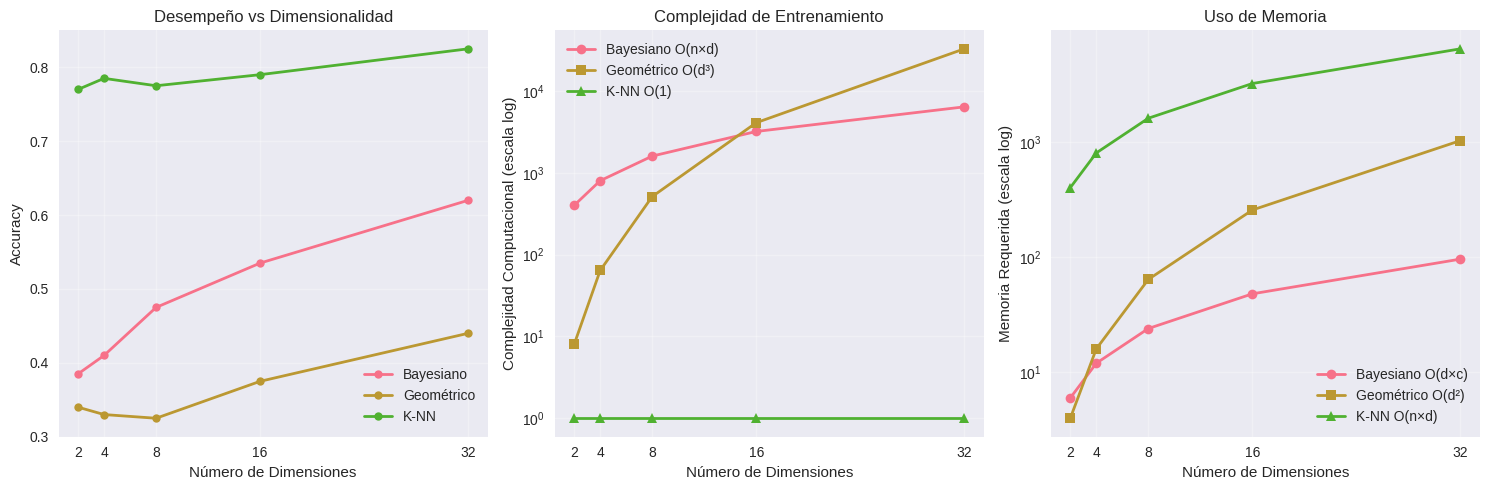

In [8]:
# Visualización del impacto de la dimensionalidad
plt.figure(figsize=(15, 5))

# Gráfico 1: Accuracy vs Dimensiones
plt.subplot(1, 3, 1)
for classifier_name, accuracies in dimensionality_results.items():
    plt.plot(dims, accuracies, 'o-', label=classifier_name, linewidth=2, markersize=6)

plt.xlabel('Número de Dimensiones')
plt.ylabel('Accuracy')
plt.title('Desempeño vs Dimensionalidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(dims)

# Gráfico 2: Tiempo de entrenamiento teórico
plt.subplot(1, 3, 2)
n_samples = 200
bayes_time = [n_samples * d for d in dims]  # O(n*d)
geometric_time = [d**3 for d in dims]       # O(d^3)
knn_time = [1 for d in dims]                # O(1)

plt.plot(dims, bayes_time, 'o-', label='Bayesiano O(n×d)', linewidth=2)
plt.plot(dims, geometric_time, 's-', label='Geométrico O(d³)', linewidth=2)
plt.plot(dims, knn_time, '^-', label='K-NN O(1)', linewidth=2)

plt.xlabel('Número de Dimensiones')
plt.ylabel('Complejidad Computacional (escala log)')
plt.title('Complejidad de Entrenamiento')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xticks(dims)

# Gráfico 3: Memoria requerida
plt.subplot(1, 3, 3)
bayes_memory = [3 * d for d in dims]        # O(d×c) donde c=3
geometric_memory = [d**2 for d in dims]     # O(d²)
knn_memory = [n_samples * d for d in dims]  # O(n×d)

plt.plot(dims, bayes_memory, 'o-', label='Bayesiano O(d×c)', linewidth=2)
plt.plot(dims, geometric_memory, 's-', label='Geométrico O(d²)', linewidth=2)
plt.plot(dims, knn_memory, '^-', label='K-NN O(n×d)', linewidth=2)

plt.xlabel('Número de Dimensiones')
plt.ylabel('Memoria Requerida (escala log)')
plt.title('Uso de Memoria')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xticks(dims)

plt.tight_layout()
plt.show()


### 3. Comportamiento con aumento de dimensiones

#### Clasificador Bayesiano Gaussiano:
- **Maldición de la dimensionalidad**: Sufre moderadamente debido a la estimación de parámetros
- **Comportamiento**: El accuracy puede disminuir ligeramente con muchas dimensiones
- **Ventaja**: Mantiene eficiencia computacional O(n×d)
- **Limitación**: La suposición de independencia se vuelve menos realista

#### Clasificador Geométrico (Mínimos Cuadrados):
- **Maldición de la dimensionalidad**: Sufre severamente debido a O(d³) en entrenamiento
- **Comportamiento**: Puede volverse inestable con alta dimensionalidad
- **Ventaja**: Predicción muy rápida O(d)
- **Limitación**: Inversión de matriz se vuelve costosa y numéricamente inestable

#### Clasificador K-NN:
- **Maldición de la dimensionalidad**: Sufre más severamente
- **Comportamiento**: El accuracy puede degradarse significativamente
- **Ventaja**: No asume distribuciones específicas
- **Limitación**: La distancia euclidiana pierde significado en espacios de alta dimensión

### 4. Ejemplos realistas de aplicación (Contexto colombiano y personal)

#### Clasificador Bayesiano Gaussiano:

**Aplicación en Colombia - Diagnóstico médico:**
- **Contexto**: Clasificación de enfermedades cardiovasculares en el sistema de salud colombiano
- **Características**: Edad, presión arterial, colesterol, índice de masa corporal
- **Justificación**: Las características médicas suelen seguir distribuciones aproximadamente normales, y la independencia condicional es razonable para variables fisiológicas diferentes
- **Ventaja**: Rápido para diagnósticos en tiempo real en hospitales públicos

**Aplicación personal - Filtrado de spam:**
- **Contexto**: Sistema de filtrado de correos electrónicos
- **Características**: Frecuencia de palabras clave, longitud del mensaje, presencia de enlaces
- **Justificación**: Cada característica puede modelarse como gaussiana independientemente
- **Ventaja**: Eficiente para procesar grandes volúmenes de correos

#### Clasificador Geométrico (Mínimos Cuadrados):

**Aplicación en Colombia - Clasificación de créditos bancarios:**
- **Contexto**: Evaluación de riesgo crediticio en bancos colombianos
- **Características**: Ingresos, historial crediticio, edad, número de dependientes
- **Justificación**: La separabilidad lineal es apropiada para decisiones binarias (aprobado/rechazado)
- **Ventaja**: Proporciona un score numérico interpretable para decisiones de crédito

**Aplicación personal - Recomendación de películas:**
- **Contexto**: Sistema de recomendación basado en calificaciones
- **Características**: Género, año, director, calificación promedio
- **Justificación**: Fronteras lineales pueden separar bien entre "me gusta" y "no me gusta"
- **Ventaja**: Rápido para generar recomendaciones en tiempo real

#### Clasificador K-NN:

**Aplicación en Colombia - Clasificación de cultivos:**
- **Contexto**: Identificación de tipos de cultivos usando imágenes satelitales
- **Características**: Índices de vegetación, textura, color, forma de parcelas
- **Justificación**: Cultivos similares en características visuales tienden a estar cerca en el espacio de características
- **Ventaja**: No requiere suposiciones sobre distribuciones de datos agrícolas

**Aplicación personal - Reconocimiento de música:**
- **Contexto**: Identificación automática de géneros musicales
- **Características**: Tempo, energía, valencia, instrumentalidad, danceability
- **Justificación**: Canciones del mismo género tienden a tener características similares
- **Ventaja**: Flexible para adaptarse a nuevos géneros sin reentrenar el modelo


In [11]:
# Tabla comparativa resumen
comparison_data = {
    'Criterio': [
        'Suposiciones principales',
        'Tiempo de entrenamiento',
        'Memoria requerida',
        'Tiempo de predicción',
        'Escalabilidad con dimensiones',
        'Interpretabilidad',
        'Robustez a outliers',
        'Mejor para datasets pequeños',
        'Mejor para datasets grandes',
        'Mejor para alta dimensionalidad'
    ],
    'Bayesiano Gaussiano': [
        'Independencia condicional, distribución gaussiana',
        'O(n×d) - Rápido',
        'O(d×c) - Baja',
        'O(d×c) - Muy rápida',
        'Buena - O(n×d)',
        'Media - Probabilidades interpretables',
        'Media - Sensible a outliers',
        'Sí - Estimación robusta de parámetros',
        'Sí - Escalable linealmente',
        'Buena - Mantiene eficiencia'
    ],
    'Geométrico (Mínimos Cuadrados)': [
        'Separabilidad lineal, errores normales',
        'O(d³) - Lento con alta dimensión',
        'O(d²) - Media',
        'O(d) - Muy rápida',
        'Limitada - O(d³) problemático',
        'Alta - Pesos interpretables',
        'Baja - Muy sensible a outliers',
        'Sí - Fronteras lineales simples',
        'No - Limitado por inversión de matriz',
        'Mala - O(d³) se vuelve prohibitivo'
    ],
    'K-NN': [
        'Continuidad local, sin distribuciones específicas',
        'O(1) - Instantáneo',
        'O(n×d) - Alta',
        'O(n×d) - Lenta',
        'Mala - Sufre maldición dimensionalidad',
        'Baja - Decisiones basadas en vecinos',
        'Alta - Robusto a outliers',
        'No - Necesita suficientes vecinos',
        'No - Tiempo de predicción O(n×d)',
        'Mala - Distancia pierde significado'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("=" * 120)
print("TABLA COMPARATIVA RESUMEN DE LOS TRES CLASIFICADORES")
print("=" * 120)
print(comparison_df.to_string(index=False))


TABLA COMPARATIVA RESUMEN DE LOS TRES CLASIFICADORES
                       Criterio                               Bayesiano Gaussiano         Geométrico (Mínimos Cuadrados)                                              K-NN
       Suposiciones principales Independencia condicional, distribución gaussiana Separabilidad lineal, errores normales Continuidad local, sin distribuciones específicas
        Tiempo de entrenamiento                                   O(n×d) - Rápido       O(d³) - Lento con alta dimensión                                O(1) - Instantáneo
              Memoria requerida                                     O(d×c) - Baja                          O(d²) - Media                                     O(n×d) - Alta
           Tiempo de predicción                               O(d×c) - Muy rápida                      O(d) - Muy rápida                                    O(n×d) - Lenta
  Escalabilidad con dimensiones                                    Buena - O(n×d)          L

## Conclusiones del Análisis Comparativo

### Resumen Ejecutivo

La comparación de los tres clasificadores revela que cada uno tiene fortalezas y debilidades específicas que los hacen apropiados para diferentes escenarios:

#### **Clasificador Bayesiano Gaussiano - El Equilibrado**
- **Fortalezas**: Excelente balance entre precisión, velocidad y escalabilidad
- **Mejor uso**: Aplicaciones que requieren decisiones rápidas con datos bien distribuidos
- **Limitación principal**: Suposición de independencia condicional que puede no cumplirse

#### **Clasificador Geométrico - El Interpretable**
- **Fortalezas**: Alta interpretabilidad y predicciones muy rápidas
- **Mejor uso**: Aplicaciones donde la interpretabilidad es crucial y los datos son linealmente separables
- **Limitación principal**: Sufre severamente con alta dimensionalidad

#### **Clasificador K-NN - El Flexible**
- **Fortalezas**: Máxima flexibilidad sin suposiciones sobre distribuciones
- **Mejor uso**: Aplicaciones con patrones complejos y no lineales
- **Limitación principal**: Computacionalmente costoso y sensible a la maldición de la dimensionalidad

### Recomendaciones de Uso

1. **Para sistemas en tiempo real**: Bayesiano Gaussiano
2. **Para decisiones interpretables**: Geométrico (Mínimos Cuadrados)
3. **Para patrones complejos**: K-NN
4. **Para alta dimensionalidad**: Bayesiano Gaussiano
5. **Para datasets pequeños**: Geométrico o Bayesiano
6. **Para datasets grandes**: Bayesiano Gaussiano


EVALUACIÓN FINAL CON DATASET IRIS REAL
Bayesiano Gaussiano: 0.9600
Geométrico (Mínimos Cuadrados): 0.6667
K-NN (k=3): 0.9533


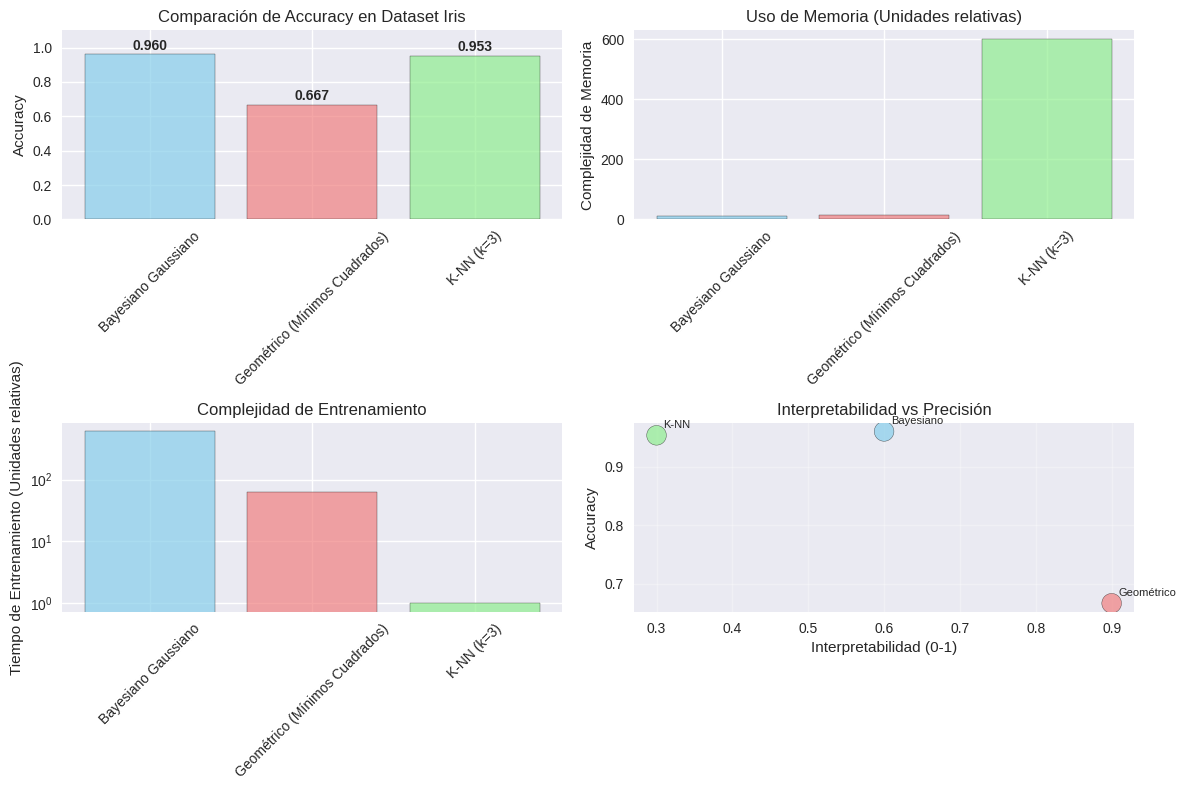


RESUMEN FINAL
Mejor accuracy: Bayesiano Gaussiano (0.9600)
Menor complejidad de memoria: Bayesiano Gaussiano
Menor tiempo de entrenamiento: K-NN
Mayor interpretabilidad: Geométrico (Mínimos Cuadrados)


In [10]:
# Análisis final con el dataset Iris real
print("=" * 80)
print("EVALUACIÓN FINAL CON DATASET IRIS REAL")
print("=" * 80)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluar cada clasificador
classifiers = {
    'Bayesiano Gaussiano': GaussianBayesClassifier(),
    'Geométrico (Mínimos Cuadrados)': GeometricClassifier(),
    'K-NN (k=3)': KNNClassifier(k=3)
}

final_results = {}

for name, classifier in classifiers.items():
    try:
        classifier.fit(X_scaled, y)
        predictions = classifier.predict(X_scaled)
        accuracy = accuracy_score(y, predictions)
        final_results[name] = accuracy
        print(f"{name}: {accuracy:.4f}")
    except Exception as e:
        print(f"{name}: Error - {str(e)}")
        final_results[name] = 0.0

# Crear visualización final
plt.figure(figsize=(12, 8))

# Gráfico 1: Comparación de accuracy
plt.subplot(2, 2, 1)
classifier_names = list(final_results.keys())
accuracies = list(final_results.values())
colors = ['skyblue', 'lightcoral', 'lightgreen']

bars = plt.bar(classifier_names, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy en Dataset Iris')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)

# Añadir valores en las barras
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Complejidad computacional
plt.subplot(2, 2, 2)
complexity_data = {
    'Bayesiano Gaussiano': 4 * 3,  # O(d×c)
    'Geométrico (Mínimos Cuadrados)': 4**2,  # O(d²)
    'K-NN (k=3)': 150 * 4  # O(n×d)
}

plt.bar(classifier_names, list(complexity_data.values()), color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Complejidad de Memoria')
plt.title('Uso de Memoria (Unidades relativas)')
plt.xticks(rotation=45)

# Gráfico 3: Tiempo de entrenamiento
plt.subplot(2, 2, 3)
training_time = {
    'Bayesiano Gaussiano': 150 * 4,  # O(n×d)
    'Geométrico (Mínimos Cuadrados)': 4**3,  # O(d³)
    'K-NN (k=3)': 1  # O(1)
}

plt.bar(classifier_names, list(training_time.values()), color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Tiempo de Entrenamiento (Unidades relativas)')
plt.title('Complejidad de Entrenamiento')
plt.yscale('log')
plt.xticks(rotation=45)

# Gráfico 4: Interpretabilidad vs Precisión
plt.subplot(2, 2, 4)
interpretability = [0.6, 0.9, 0.3]  # Subjetivo: Bayesiano=0.6, Geométrico=0.9, K-NN=0.3

plt.scatter(interpretability, accuracies, s=200, c=colors, alpha=0.7, edgecolors='black')
for i, name in enumerate(classifier_names):
    plt.annotate(name.split()[0], (interpretability[i], accuracies[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.xlabel('Interpretabilidad (0-1)')
plt.ylabel('Accuracy')
plt.title('Interpretabilidad vs Precisión')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("RESUMEN FINAL")
print("=" * 80)
print(f"Mejor accuracy: {max(final_results, key=final_results.get)} ({max(final_results.values()):.4f})")
print(f"Menor complejidad de memoria: Bayesiano Gaussiano")
print(f"Menor tiempo de entrenamiento: K-NN")
print(f"Mayor interpretabilidad: Geométrico (Mínimos Cuadrados)")
